# API Request



In [150]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
import seaborn as sns
import matplotlib
from MCForecastTools import MCSimulation
from matplotlib import pyplot as plt
from pathlib import Path


#### Step 1: Set the .env file to store the secret keys codes.

In [151]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [177]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify Alpaca key and Secret key were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [178]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["CEI"]

# Set timeframe to 15 minutes interval 
timeframe = "15Min"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
start = pd.Timestamp("2021-08-1 09:00", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-1 14:00", tz="America/New_York").isoformat()

# Set timeframe to 15 minutes interval 
timeframe_2 = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
start_2 = pd.Timestamp("2021-9-27", tz="America/New_York").isoformat()
end_2 = pd.Timestamp("2021-10-03", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `CEI` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [180]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Review the first 5 rows of the Alpaca DataFrame
display(df_ticker.head(5))
display(df_ticker.tail(5))

# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_ticker_2 = alpaca.get_barset(
    tickers,
    timeframe_2,
    start = start_2,
    end = end_2,
    limit = 1000
).df



CEI                               
                             open    high     low   close volume
time                                                            
2021-08-02 09:00:00-04:00  0.4576  0.4576  0.4566  0.4566    200
2021-08-02 09:15:00-04:00  0.4548  0.4548  0.4546  0.4546    200
2021-08-02 09:30:00-04:00  0.4514  0.4514  0.4498  0.4498    200
2021-08-02 09:45:00-04:00  0.4484  0.4498  0.4484  0.4498    200
2021-08-02 10:15:00-04:00  0.4470  0.4470  0.4470  0.4470    387

CEI                            
                            open   high    low  close volume
time                                                        
2021-10-01 13:00:00-04:00  3.135  3.185  3.100  3.175  11114
2021-10-01 13:15:00-04:00  3.160  3.160  3.110  3.125  15240
2021-10-01 13:30:00-04:00  3.115  3.135  3.055  3.115  21425
2021-10-01 13:45:00-04:00  3.125  3.200  3.125  3.160  18138
2021-10-01 14:00:00-04:00  3.170  3.215  3.100  3.125  45862

In [181]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of CEI
df_closing_prices["CEI"] = df_ticker["CEI"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

# Create and empty DataFrame for closing prices
df_closing_prices_2 = pd.DataFrame()

# Fetch the closing prices of CEI
df_closing_prices_2["CEI"] = df_ticker_2["CEI"]["close"]

# Drop the time component of the date
df_closing_prices_2.index = df_closing_prices_2.index.date

# Compute daily returns
df_daily_returns_2 = df_closing_prices_2.pct_change().dropna()


Text(0.5, 1.0, 'CEI Daily Closing Price')

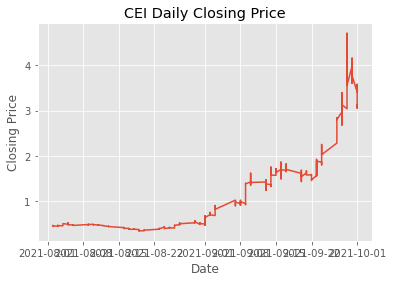

In [182]:
# Plot the CEI stock closing price
matplotlib.style.use('ggplot')
df_closing_prices["CEI"].plot()
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("CEI Daily Closing Price")

In [183]:
# Generate descriptive statistics
df_daily_returns.describe()

,CEI
count,997.000000
mean,0.002327
std,0.028398
min,-0.176166
25%,-0.010753
50%,0.000000
75%,0.011765
max,0.251227


Text(0.5, 1.0, 'CEI % change in Closing Price')

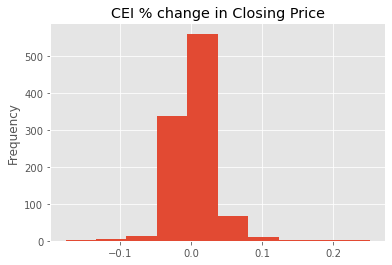

In [184]:
# Visualize distribution of IBM percent change in closing price using a histogram plot
matplotlib.style.use('ggplot')
df_daily_returns["CEI"].plot.hist()
plt.title("CEI % change in Closing Price")

Text(0.5, 1.0, 'CEI % change in Closing Price Density Plot')

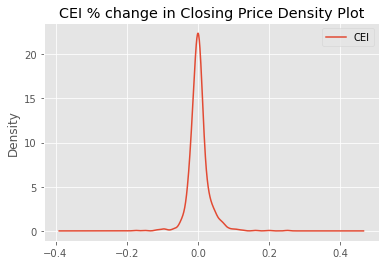

In [185]:
# Visualize the distribution of percent change in closing price using a density plot
matplotlib.style.use('ggplot')
df_daily_returns.plot.density()
plt.title("CEI % change in Closing Price Density Plot")

#### Step 4: Run a Monte Carlo simulation of 500 samples for a year, and then plot the results.

In [186]:
# Configure the Monte Carlo simulation to forecast cumulative returns for the next 252 days
# Run 500 samples.
MC_CEI = MCSimulation(
    portfolio_data = df_ticker,
    num_simulation = 500,
    num_trading_days = 252
)

# Review the simulation input data
MC_CEI.portfolio_data.head()


CEI                                            
                             open    high     low   close volume daily_return
time                                                                         
2021-08-02 09:00:00-04:00  0.4576  0.4576  0.4566  0.4566    200          NaN
2021-08-02 09:15:00-04:00  0.4548  0.4548  0.4546  0.4546    200    -0.004380
2021-08-02 09:30:00-04:00  0.4514  0.4514  0.4498  0.4498    200    -0.010559
2021-08-02 09:45:00-04:00  0.4484  0.4498  0.4484  0.4498    200     0.000000
2021-08-02 10:15:00-04:00  0.4470  0.4470  0.4470  0.4470    387    -0.006225

In [187]:
# Run the Monte Carlo simulation to forecast next year cumulative returns
MC_CEI.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.975873,1.070110,0.980008,0.980383,0.966600,0.956075,0.982911,1.067025,0.950798,0.959302,...,1.027817,0.977273,0.973780,0.956032,0.949420,1.026931,1.060288,0.999698,0.990299,0.994102
2,0.980025,1.105114,0.988969,1.030770,0.986034,0.967582,1.000818,1.097381,0.918994,0.978169,...,1.031102,0.998133,0.991009,1.006515,0.939469,1.021347,1.108223,0.994480,0.979040,1.037799
3,0.992715,1.063258,0.958251,1.013681,0.977766,0.961276,0.982794,1.099185,0.918059,0.983014,...,1.024653,1.012572,1.026125,1.016580,0.885154,1.079586,1.100958,0.945857,1.034698,1.055964
4,0.964374,1.083359,0.946938,1.023605,0.963281,0.917144,0.954930,1.094416,0.942175,0.988898,...,1.063479,1.036929,0.966935,1.093054,0.905711,1.073472,1.105680,0.924204,1.094560,1.041890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.866999,1.952169,3.475468,1.431967,0.988718,1.391152,1.669452,2.836622,1.906649,2.661770,...,1.768760,2.201512,2.090207,2.109147,1.668755,0.871018,2.918978,1.282970,1.067980,2.011603
249,0.888034,1.885635,3.643485,1.415598,0.955639,1.412275,1.700340,2.827657,1.901873,2.586714,...,1.833997,2.282346,2.041254,2.050114,1.690261,0.855463,2.921538,1.283646,1.072585,2.014216
250,0.879605,1.858932,3.852334,1.491083,0.951548,1.372912,1.796806,2.835679,1.929484,2.570114,...,1.765667,2.283649,1.932862,2.061758,1.809083,0.849045,2.910347,1.202835,1.037448,1.970063
251,0.919670,1.885580,3.937761,1.494134,0.926517,1.430299,1.812333,2.786051,1.974450,2.647968,...,1.730862,2.328482,1.896548,2.051019,1.705418,0.857815,2.720767,1.218093,1.072786,2.059568


Text(0.5, 1.0, 'Cumulative Return 1Y Trajectories')

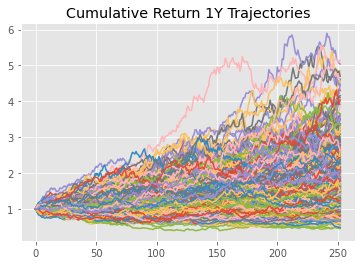

In [188]:
# Visualize the Monte Carlo simulation
matplotlib.style.use('ggplot')
MC_sim_line_plot = MC_CEI.plot_simulation()
plt.title("Cumulative Return 1Y Trajectories")

In [189]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_CEI.simulated_return.mean(axis=1)),
    "median": list(MC_CEI.simulated_return.median(axis=1)),
    "min": list(MC_CEI.simulated_return.min(axis=1)),
    "max": list(MC_CEI.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001425,1.000297,0.910036,1.094712
2,1.004201,1.004567,0.835771,1.166349
3,1.005455,1.003271,0.821097,1.187341
4,1.006700,1.001000,0.801996,1.228121


<AxesSubplot:title={'center':'Daily Returns Trajectory of CEI Stock Over the Next Year'}>

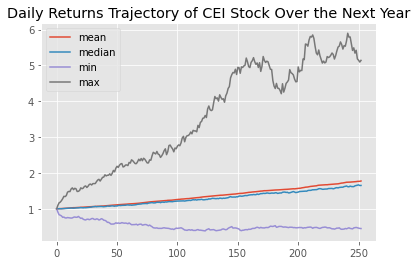

In [190]:
# Plot the trajectory of CEI stock daily returns
matplotlib.style.use('ggplot')
df_simulated_returns.plot(title="Daily Returns Trajectory of CEI Stock Over the Next Year")

#### Step 5: Plot the probability distribution of the Monte Carlo simulation.

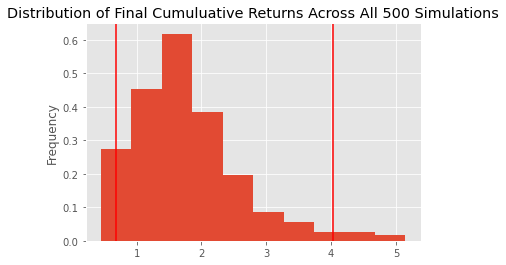

In [191]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
matplotlib.style.use('ggplot')
MC_sim_dist_plot = MC_CEI.plot_distribution()


#### Step 6: Generate the summary statistics for the Monte Carlo simulation.

In [192]:
# Generate summary statistics from the 1 year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_CEI.summarize_cumulative_return()


# Review the 1 year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              1.776743
std               0.810187
min               0.449642
25%               1.205005
50%               1.652130
75%               2.134895
max               5.143007
95% CI Lower      0.674442
95% CI Upper      4.028957
Name: 252, dtype: float64


In [193]:
# Export dataframe to .csv file
df_file = pd.DataFrame()

df_file["open"] = df_ticker["CEI"]["open"]
df_file["high"] = df_ticker["CEI"]["high"]
df_file["low"] = df_ticker["CEI"]["low"]
df_file["close"] = df_ticker["CEI"]["close"]
df_file["volume"] = df_ticker["CEI"]["volume"]

df_file.to_csv(Path('../Resources/CEI_data.csv'))

In [194]:
df_daily_returns_2.index.name = 'date'
df_daily_returns_2.head()


,CEI
date,
2021-09-28,0.188192
2021-09-29,0.055932
2021-09-30,0.114673
2021-10-01,-0.147757


In [195]:
twitter_df = pd.read_csv(Path
    ('../Twitter/twitter_data_CLEANED.csv'), index_col='date')
twitter_df = twitter_df.drop('Unnamed: 0', axis=1)
twitter_df.head()

,tweet
date,
2021-10-03 23:59:05,"'joi, humiliation tasks, and foot worship sess..."
2021-10-03 23:58:54,'we have two choice hold $cei or sell $cei . y...
2021-10-03 23:51:15,'anyone selling foot or lip pics dm me or comm...
2021-10-03 23:49:44,'rt : stocks i\xe2\x80\x99m either in or watch...
2021-10-03 23:47:22,'stocks i\xe2\x80\x99m either in or watching t...


In [196]:
twitter_df.index= pd.to_datetime(twitter_df.index, format= '%Y-%m-%d').strftime('%Y-%m-%d')

In [197]:
display(twitter_df.head())
display(twitter_df.tail())

,tweet
date,
2021-10-03,"'joi, humiliation tasks, and foot worship sess..."
2021-10-03,'we have two choice hold $cei or sell $cei . y...
2021-10-03,'anyone selling foot or lip pics dm me or comm...
2021-10-03,'rt : stocks i\xe2\x80\x99m either in or watch...
2021-10-03,'stocks i\xe2\x80\x99m either in or watching t...


,tweet
date,
2021-09-27,"""_whales a lot of butt hurt people in here... ..."
2021-09-27,""" _whales this guy sells and doesn't over old ..."
2021-09-27,'rt : stocks i\xe2\x80\x99m either in or watch...
2021-09-27,'rt : unless youre looking for a dickrate or b...
2021-09-27,'thinking of a couple names when it\xe2\x80\x9...


In [198]:
df_list = [df_daily_returns_2,twitter_df]
twitter_percent_df = pd.concat(df_list)
twitter_percent_df.head()

,CEI,tweet
date,,
2021-09-28,0.188192,NaN
2021-09-29,0.055932,NaN
2021-09-30,0.114673,NaN
2021-10-01,-0.147757,NaN
2021-10-03,NaN,"'joi, humiliation tasks, and foot worship sess..."
